# **<center>Proyecto final</center>**
## **<center>Caso: Synergy logistics.</center>**

Synergy logistics es una empresa dedicada a la intermediación de servicios de **importación** y **exportacion** de diferentes productos, dicha empresa requiere analizar la viabilidad de 3 opciones que se muestran a continuación:
* Rutas de importación y exportación 
* Medio de transporte utilizado
* Valor total de importaciones y exportaciones

Para comenzar con el análisis primero cargamos las librerías que hemos de utilizar durante el desarrollo del código.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt

Una vez cargadas las librerías, leemos los datos proporcionados por la empresa, indicando que el id va a ser nuestro índice dentro del DataFrame:

In [3]:
datos = pd.read_csv("synergy_logistics_database.csv", index_col=0)
datos

direction    origin destination  year      date       product  \
register_id                                                                 
1             Exports     Japan       China  2015  31/01/15          Cars   
2             Exports     Japan       China  2015  01/02/15          Cars   
3             Exports     Japan       China  2015  02/02/15          Cars   
4             Exports     Japan       China  2015  03/02/15          Cars   
5             Exports     Japan       China  2015  04/02/15          Cars   
...               ...       ...         ...   ...       ...           ...   
19052         Imports     Japan   Singapore  2020  27/06/20  Gas turbines   
19053         Imports  Malaysia   Singapore  2020  28/06/20  Gas turbines   
19054         Imports  Malaysia   Singapore  2020  29/06/20  Gas turbines   
19055         Imports  Malaysia   Singapore  2020  30/06/20  Gas turbines   
19056         Imports  Malaysia   Singapore  2020  01/07/20  Gas turbines   

            transport_mode     company_name  total_value  
register_id                                               
1                      Sea            Honda     33000000  
2                      Sea            Honda     16000000  
3                      Sea            Honda     29000000  
4                      Sea            Honda     14000000  
5                      Sea            Honda     17000000  
...                    ...              ...          ...  
19052                  Sea  Union Energy Co      1000000  
19053                  Sea  Union Energy Co      2000000  
19054                  Sea  Union Energy Co     33000000  
19055                  Sea  Union Energy Co     13000000  
19056                  Sea  Union Energy Co     30000000  

[19056 rows x 9 columns]

Como no se tiene la certeza del tipo de datos que nos proporcionaron, procedemos a cambiar su tipo con el comando **"astype"** para evitar al máximo errores con operaciones:

In [4]:
datos["direction"] = datos["direction"].astype("string")
datos["origin"] = datos["origin"].astype("string")
datos["destination"] = datos["destination"].astype("string")
datos["product"] = datos["product"].astype("string")
datos["transport_mode"] = datos["transport_mode"].astype("string")
datos["company_name"] = datos["company_name"].astype("string")


Una vez cambiado el tipo de dato de cada columna dentro de nuestro DataFrame, procedemos a responder el primer punto de la consiga: Acorde a los flujos de de **importación y exportación**  **¿Cuáles son las 10 rutas más demandadas?** **¿Le conviene implementar esa estrategia? ¿porqué?** 

Para ello primero extraemos los campos que son de interés, estos son: **"direction","origin","destination"**

In [5]:
rutas = datos[["direction","origin","destination"]]
top_rutas = rutas.value_counts().to_frame()
top_rutas.head(10)

0
direction origin      destination     
Exports   South Korea Vietnam      497
          Netherlands Belgium      437
          USA         Netherlands  436
          China       Mexico       330
          Japan       Brazil       306
          Germany     France       299
          South Korea Japan        279
          Australia   Singapore    273
Imports   Singapore   Thailand     273
Exports   Canada      Mexico       261

Vemos que la empresa **realiza más exportaciones** y que su ruta más demandada es de **Corea del Sur a Vietnam.** con una demanda histórica de **497 exportaciones**, esto era de esperarse pues acorde a la *Organización Mundial del Comercio*, Corea del Sur ha incrementado sus exportaciones de bienes a partir del 2015, convirtiendolo en el país número 7 con más exportaciones en el mundo, gracias a dicho crecimiento la ruta por concepto de exportación de Corea del Sur es una de las más solicitadas para la empresa. La nota completa se encuentra en: https://santandertrade.com/es/portal/analizar-mercados/corea-del-sur/cifras-comercio-exterior

**¿Le conviene a la empresa implementar la estrategia?** La respuesta es [sí](https://es.statista.com/estadisticas/635356/principales-paises-exportadores-a-nivel-mundial-en/) (por el momento), esto debido a que la empresa tiene rutas con algunos paises que tienen más actividad en exportaciones e importaciones a nivel mundial,esto nos da indicios de que hay una alta actividad en la demanda o existe una necesidad fuerte de transportar productos que se envían y que se reciben por lo que puede resultar conveniente centrarse en esta estrategia. 

Procedemos ahora responder el **segundo punto de la consigna**, para ello filtramos la columna **"transport_mode"** para conocer todos los medios de transporte utilizados por la empresa:

In [6]:
medios_transporte = datos[["transport_mode"]].value_counts()
print(medios_transporte)

transport_mode
Sea               10688
Rail               3381
Road               2598
Air                2389
dtype: int64


Gráficamente los medios más utilizados son:

Text(0, 0.5, 'frecuencia de uso')

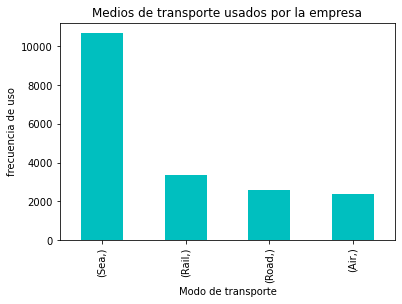

In [7]:
medios_transporte.plot(kind = "bar", title= "Medios de transporte usados por la empresa", color = ["c"]) 
plt.xlabel("Modo de transporte")
plt.ylabel("frecuencia de uso")

Para saber cuál es el medio más utilizado acorde al valor de las exportaciones e importaciones, seccionamos el DataFrame acorde a los medios que la empresa utiliza; igual podemos seccionar por exportaciones y encontrar los medios más usados acorde a su valor, también aplicar el mismo procedimiento para las importaciones.

In [8]:
top_medios = datos[["direction","transport_mode","total_value"]]
sea = top_medios[top_medios["transport_mode"] == "Sea"]
rail = top_medios[top_medios["transport_mode"] == "Rail"]
road = top_medios[top_medios["transport_mode"] == "Road"]
air = top_medios[top_medios["transport_mode"] == "Air"]

Una vez filtrada la información por medio de transporte, analizamos su comportamiento partiendo de los rubros **"exportaciones e importaciones"**

In [9]:
sea_exp = sea[sea["direction"]=="Exports"]

sea_exp_total = sea_exp["total_value"].sum()

sea_imp = sea[sea["direction"]=="Imports"]

sea_imp_total = sea_imp["total_value"].sum()


Text(0.5, 1.0, 'Transporte marítimo: Exportaciones vs Importaciones')

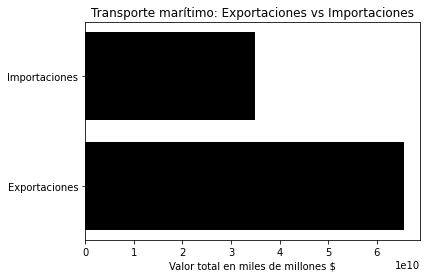

In [10]:
rubro = ["Exportaciones", "Importaciones"]
valor = [sea_exp_total, sea_imp_total]
plt.barh(rubro,valor, color =["k"])
plt.xlabel("Valor total en miles de millones $")
plt.title("Transporte marítimo: Exportaciones vs Importaciones")


Como puede apreciarse en el gráfico, hay más exportaciones que importaciones, sumando un total de **$65,592,622,000 por concepto de exportaciones** teniendo mayor peso en las exportaciones. Para conocer la suma total por concepto de importaciones y exportaciones del transporte marítimo se puede correr el siguiente código: 

In [11]:
import locale
locale.setlocale( locale.LC_ALL, '' )
locale.currency(sea["total_value"].sum() , grouping=True )

'$100,530,622,000.00'

## Rail:


In [12]:
rail_exp = rail[rail["direction"]=="Exports"]

rail_exp_total = rail_exp["total_value"].sum()

rail_imp = rail[rail["direction"]=="Imports"]

rail_imp_total = rail_imp["total_value"].sum()

Text(0.5, 1.0, 'Transporte Ferroviario: Exportaciones vs Importaciones')

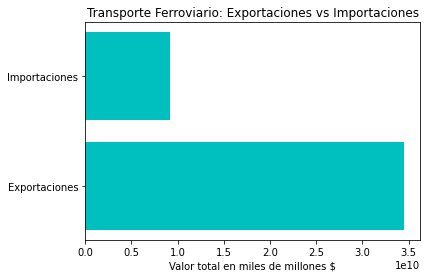

In [13]:
rubro_rail = ["Exportaciones", "Importaciones"]
valor_rail = [rail_exp_total, rail_imp_total]
plt.barh(rubro_rail,valor_rail, color =["c"])
plt.xlabel("Valor total en miles de millones $")
plt.title("Transporte Ferroviario: Exportaciones vs Importaciones")

Al parecer las exportaciones siguen ganando en este rubro por la cantidad de **$34,505,043,000**. El total de este rubro se aprecia ejecutando la siguiente linea de código:


In [14]:
locale.currency(rail["total_value"].sum() , grouping=True )

'$43,628,043,000.00'

## Road:

In [15]:
road_exp = road[road["direction"]=="Exports"]

road_exp_total = road_exp["total_value"].sum()

road_imp = road[road["direction"]=="Imports"]

road_imp_total = road_imp["total_value"].sum()

Text(0.5, 1.0, 'Transporte Terrestre: Exportaciones vs Importaciones')

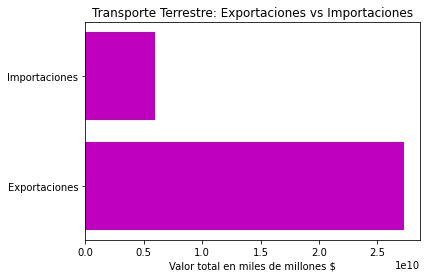

In [16]:
rubro_road = ["Exportaciones", "Importaciones"]
valor_road = [road_exp_total, road_imp_total]
plt.barh(rubro_road,valor_road, color =["m"])
plt.xlabel("Valor total en miles de millones $")
plt.title("Transporte Terrestre: Exportaciones vs Importaciones")

La suma de este rubro es:

In [17]:
locale.currency(road["total_value"].sum() , grouping=True )

'$33,270,486,000.00'

## Air:

In [18]:
air_exp = air[air["direction"]=="Exports"]

air_exp_total = air_exp["total_value"].sum()

air_imp = air[air["direction"]=="Imports"]

air_imp_total = air_imp["total_value"].sum()

Text(0.5, 1.0, 'Transporte Aereo: Exportaciones vs Importaciones')

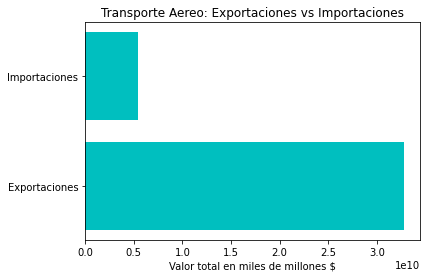

In [19]:
rubro_air = ["Exportaciones", "Importaciones"]
valor_air = [air_exp_total, air_imp_total]
plt.barh(rubro_air,valor_air, color =["c"])
plt.xlabel("Valor total en miles de millones $")
plt.title("Transporte Aereo: Exportaciones vs Importaciones")

In [20]:
locale.currency(air["total_value"].sum(), grouping=True )

'$38,262,147,000.00'

Procedemos ahora a generar un diccionario donde la llave es el tipo de transporte y el valor de esa llave es la suma total de sus importaciones y exportaciones para así determinar sus medios de transporte más utilizados:

In [21]:
valores_finales = {"sea": sea["total_value"].sum(), "rail": rail["total_value"].sum(), "road": road["total_value"].sum(),
                   "air": air["total_value"].sum()}

In [22]:
from operator import itemgetter

top = sorted(valores_finales.items(), key = itemgetter(1))

print(top)

[('road', 33270486000), ('air', 38262147000), ('rail', 43628043000), ('sea', 100530622000)]


Por lo tanto los valores quedan como sigue:
* Sea: 100,530,622,000.00
* Rail: 43,628,043,000.00
* Air: 38,262,147,000.00
* Road: 33,270,486,000.00


Siendo los transportes **Marítimo, Ferroviario y Aereo** los medios de transporte más importantes para Synergy logistics.

Una buena parte de sus ingresos provienen de esos 3 métodos de transporte, por lo que podrían reducir el medio **Terrestre** esto, debido a su poca actividad en relación a los otros 3 métodos que tuvieron mayor representatividad para la empresa.

Procedemos a conocer a los **paises** que ha registrado la empresa, para ello tomamos la columna **"origin"** del DataFrame Paises.

In [33]:
paises = datos[["origin"]]
paises

origin
register_id          
1               Japan
2               Japan
3               Japan
4               Japan
5               Japan
...               ...
19052           Japan
19053        Malaysia
19054        Malaysia
19055        Malaysia
19056        Malaysia

[19056 rows x 1 columns]

In [35]:
paises.value_counts().to_frame()

0
origin                    
China                 2272
USA                   1840
Japan                 1702
Germany               1664
South Korea           1295
Mexico                1138
France                1088
Australia              965
United Kingdom         929
Russia                 808
Netherlands            796
Canada                 650
Italy                  648
India                  565
Singapore              537
Brazil                 515
Spain                  478
Austria                437
Switzerland            249
Belgium                243
Malaysia               199
United Arab Emirates    20
Vietnam                 18

Una vez realizados los conteoss, vemos que paises como **China, Estados Unidos, Japón, etc** lideran en los paises que exportan e importan más frecuentemente. Para conocer el monto total por concepto de exportaciones e importaciones por cada país, filtramos por país y obtenemos la suma para ir conociendo aquellos paises que están dentro del 80% del total.

In [41]:
paises_conteo = datos[["direction","origin","total_value"]]

china = paises_conteo[paises_conteo["origin"]=="China"]

total_china = china["total_value"].sum()

locale.currency(total_china, grouping=True )

'$45,210,046,000.00'

In [42]:
usa = paises_conteo[paises_conteo["origin"]=="USA"]

total_usa = usa["total_value"].sum()

locale.currency(total_usa, grouping=True )

'$23,646,306,000.00'

In [43]:
japan = paises_conteo[paises_conteo["origin"]=="Japan"]

total_japan = japan["total_value"].sum()

locale.currency(total_japan, grouping=True )

'$20,042,976,000.00'

In [44]:
germany = paises_conteo[paises_conteo["origin"]=="Germany"]

total_germany = germany["total_value"].sum()

locale.currency(total_germany, grouping=True )

'$15,593,233,000.00'

In [45]:
sur_corea = paises_conteo[paises_conteo["origin"]=="South Korea"]

total_sur_corea = sur_corea["total_value"].sum()

locale.currency(total_sur_corea, grouping=True )

'$18,510,146,000.00'

In [46]:
mexico = paises_conteo[paises_conteo["origin"]=="Mexico"]

total_mexico = mexico["total_value"].sum()

locale.currency(total_mexico, grouping=True )

'$6,040,755,000.00'

In [47]:
francia = paises_conteo[paises_conteo["origin"]=="France"]

total_francia = francia["total_value"].sum()

locale.currency(total_francia, grouping=True )

'$19,930,332,000.00'

In [49]:
australia = paises_conteo[paises_conteo["origin"]=="Australia"]

total_australia = australia["total_value"].sum()

locale.currency(total_australia, grouping=True )

'$2,570,000,000.00'

In [50]:
ru = paises_conteo[paises_conteo["origin"]=="United Kingdom"]

total_ru = ru["total_value"].sum()

locale.currency(total_ru, grouping=True )

'$3,025,612,000.00'

In [51]:
rusia = paises_conteo[paises_conteo["origin"]=="Russia"]

total_rusia = rusia["total_value"].sum()

locale.currency(total_rusia, grouping=True )

'$14,074,000,000.00'

In [52]:
holanda = paises_conteo[paises_conteo["origin"]=="Netherlands"]

total_holanda = holanda["total_value"].sum()

locale.currency(total_holanda, grouping=True )

'$4,120,369,000.00'

Para conocer el **Valor total** de todos los paises que representan el 80% del valor de las exportaciones e importaciones se ejecuta el código de abajo, dando como resultado:

In [54]:
total_paises = total_china+total_usa+total_japan+total_germany+total_sur_corea+total_mexico+total_francia+total_australia+total_ru+total_rusia+total_holanda
locale.currency(total_paises, grouping=True )


'$172,763,775,000.00'

Los paises con los que la empresa puede enfocarse son los siguientes:

* China
* USA
* Japón
* Alemania
* Corea del Sur
* México
* Francia
* Australia 
* Reino Unido
* Rusia
* Holanda

**¿Le conviene a la empresa quedarse con los paises que representan el 80% de sus exportaciones e importaciones?** En teoría si, ya que como es posible ver, dentro de esos paises existen paises que tienen una mayor actividad económica como lo es **USA, China, Corea del Sur, etc** y considerando que statista pronostica una mayor actividad economica en relación a su **Producto Interno Bruto** es común que dichos paises en miras de crecimiento soliciten productos que tengan que ver con el transporte para poder llevar a cabo su comercialización, para más información respecto a este pronóstico se puede consultar: https://es.statista.com/estadisticas/600234/ranking-de-paises-con-el-producto-interior-bruto-pib-mas-alto-en/